Determine the observable time of the Canopus on 1900-3-21 (Vernal equinox).

Note: The proper motion of the Canopus was not considered.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [4]:
hip30438 = SkyCoord.from_name("HIP 30438")

In [5]:
taishan = EarthLocation(lat=36.2*u.deg, lon=117.1*u.deg, height=1500*u.m)
utcoffset = +8 * u.hour  # Daylight Time
midnight = Time("1900-3-20 12:00:00") - utcoffset

In [6]:
from astropy.coordinates import get_sun
delta_midnight = np.linspace(-12, 12, 1000) * u.hour
times_Mar20_to_21 = midnight + delta_midnight
frame_Mar20_to_21 = AltAz(obstime=times_Mar20_to_21, location=taishan)
sunaltazs_Mar20_to_21 = get_sun(times_Mar20_to_21).transform_to(frame_Mar20_to_21)

In [7]:
delta_midnight

<Quantity [-12.        , -11.97597598, -11.95195195, -11.92792793,
           -11.9039039 , -11.87987988, -11.85585586, -11.83183183,
           -11.80780781, -11.78378378, -11.75975976, -11.73573574,
           -11.71171171, -11.68768769, -11.66366366, -11.63963964,
           -11.61561562, -11.59159159, -11.56756757, -11.54354354,
           -11.51951952, -11.4954955 , -11.47147147, -11.44744745,
           -11.42342342, -11.3993994 , -11.37537538, -11.35135135,
           -11.32732733, -11.3033033 , -11.27927928, -11.25525526,
           -11.23123123, -11.20720721, -11.18318318, -11.15915916,
           -11.13513514, -11.11111111, -11.08708709, -11.06306306,
           -11.03903904, -11.01501502, -10.99099099, -10.96696697,
           -10.94294294, -10.91891892, -10.89489489, -10.87087087,
           -10.84684685, -10.82282282, -10.7987988 , -10.77477477,
           -10.75075075, -10.72672673, -10.7027027 , -10.67867868,
           -10.65465465, -10.63063063, -10.60660661, -10.58258

In [8]:
from astropy.coordinates import get_moon
moon_Mar20_to_21 = get_moon(times_Mar20_to_21)
moonaltazs_Mar20_to_21 = moon_Mar20_to_21.transform_to(frame_Mar20_to_21)

In [9]:
hip30438altazs_Mar20_to_21 = hip30438.transform_to(frame_Mar20_to_21)

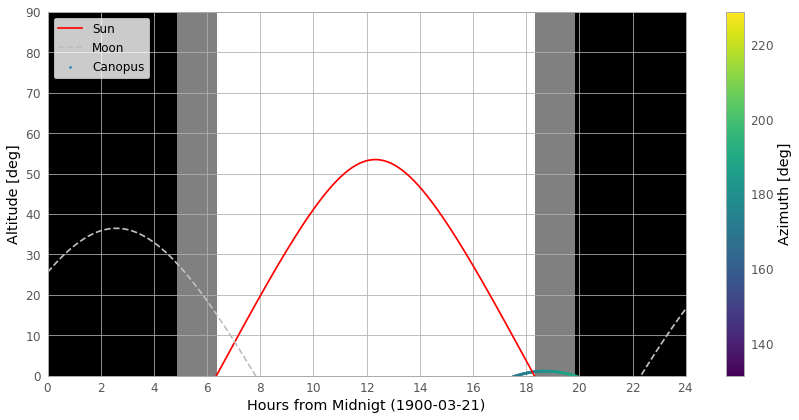

In [10]:
hourtime = delta_midnight + 12 * u.hour
plt.figure(figsize=(12, 6))
plt.plot(hourtime, sunaltazs_Mar20_to_21.alt, color='r', label='Sun')
plt.plot(hourtime, moonaltazs_Mar20_to_21.alt,
         color=[0.75]*3, ls='--', label='Moon')
plt.scatter(hourtime, hip30438altazs_Mar20_to_21.alt,
            c=hip30438altazs_Mar20_to_21.az, label='Canopus', lw=0, s=8,
            cmap='viridis')
plt.fill_between(hourtime.to('hr').value, 0, 90,
                 sunaltazs_Mar20_to_21.alt < -0*u.deg, color='0.5', zorder=0)
plt.fill_between(hourtime.to('hr').value, 0, 90,
                 sunaltazs_Mar20_to_21.alt < -18*u.deg, color='k', zorder=0)
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
plt.xlim(0, 24)
plt.xticks(np.arange(0, 25, 2))
plt.ylim(0, 90)
plt.xlabel('Hours from Midnigt (1900-03-21)')
plt.ylabel('Altitude [deg]')

plt.tight_layout()
# plt.savefig("2018-03-21.png", dpi=100)
plt.savefig("1900-03-21.eps", dpi=100)
plt.savefig("1900-03-21.png", dpi=100)